In [19]:
import pandas as pd
import numpy as np
from Levenshtein import distance as levenshtein_distance

In [20]:
raw_dataset = pd.read_csv('data/pf_suvs_i302_1s2025.csv')


In [21]:
raw_dataset

,Unnamed: 0,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,64000.0,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0.0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,65300.0,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,76898.0,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,109000.0,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,18249,Volkswagen,T-Cross,2025.0,1.0 200 Tsi Highline Bi-Tono Aut,Blanco,Nafta,5.0,Automática,1.0,SUV,NaN,0 km,Volkswagen T-Cross 1.0 200 Tsi Highline Bi-Ton...,40900000.0,$,Línea Up level!-La más completa- Consultanos c...,concesionaria
18250,18250,Volkswagen,T-Cross,2025.0,1.0 200 Tsi Comfortline Aut,Negro,Nafta,5.0,Automática,1.0,SUV,NaN,0 km,Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut,35500000.0,$,Última unidad con bonificación especial- Conta...,concesionaria
18251,18251,Volkswagen,T-Cross,2025.0,1.0 200 Tsi Comfortline Aut,Negro,Nafta,5.0,Automática,1.0,SUV,NaN,0 km,Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut,35500000.0,$,Última unidad con bonificación especial- Conta...,concesionaria
18252,18252,Volkswagen,T-Cross,2025.0,1.0 200 Tsi Comfortline Aut,Negro,Nafta,5.0,Automática,1.0,SUV,NaN,0 km,Volkswagen T-Cross 1.0 200 Tsi Comfortline Aut,35500000.0,$,Última unidad con bonificación especial- Conta...,concesionaria


In [22]:
raw_dataset["Marca"].unique()

array(['Ford', 'Volkswagen', 'Jeep', 'BAIC', 'Kia', 'Hyundai', 'Porsche',
       'Peugeot', 'Fiat', 'Chevrolet', 'Citroën', 'BMW', 'Audi', 'Honda',
       'Nissan', 'Mercedes-Benz', 'Renault', 'Suzuki', 'Toyota', 'D.S.',
       'Chery', 'Daihatsu', 'SsangYong', 'Dodge', 'JAC', 'Land Rover',
       'Alfa Romeo', 'Haval', 'Volvo', 'Lifan', 'Mini', 'D·S',
       'Mitsubishi', 'Range Rover', 'Hiunday', 'Jetour', 'GWM', 'KAIYI',
       'Lexus', 'Isuzu', 'Rrenault', 'Subaru', 'Jetur', 'DS AUTOMOBILES',
       'hiunday', 'Jaguar', 'Vol'], dtype=object)

In [23]:
raw_dataset["Marca"] = raw_dataset["Marca"].replace("Vol", "Volkswagen")

In [24]:
known_brands = [
  'Ford', 'Volkswagen', 'Jeep', 'BAIC', 'Kia', 'Hyundai', 'Porsche',
  'Peugeot', 'Fiat', 'Chevrolet', 'Citroën', 'BMW', 'Audi', 'Honda',
  'Nissan', 'Mercedes-Benz', 'Renault', 'Suzuki', 'Toyota',
  'Chery', 'Daihatsu', 'SsangYong', 'Dodge', 'JAC', 'Land Rover',
  'Alfa Romeo', 'Haval', 'Volvo', 'Lifan', 'Mini', 'D·S',
  'Mitsubishi', 'Jetour', 'GWM', 'KAIYI',
  'Lexus', 'Isuzu', 'Subaru', 'Jaguar'
]

In [25]:
for brand in known_brands:
    raw_dataset[brand] = 0

for i, marca_input in enumerate(raw_dataset['Marca']):
    dists = [levenshtein_distance(str(marca_input).lower(), brand.lower()) for brand in known_brands]
    idx_min = np.argmin(dists)
    matched_brand = known_brands[idx_min]
    raw_dataset.at[i, matched_brand] = 1

In [26]:
dolar_a_pesos = 1150

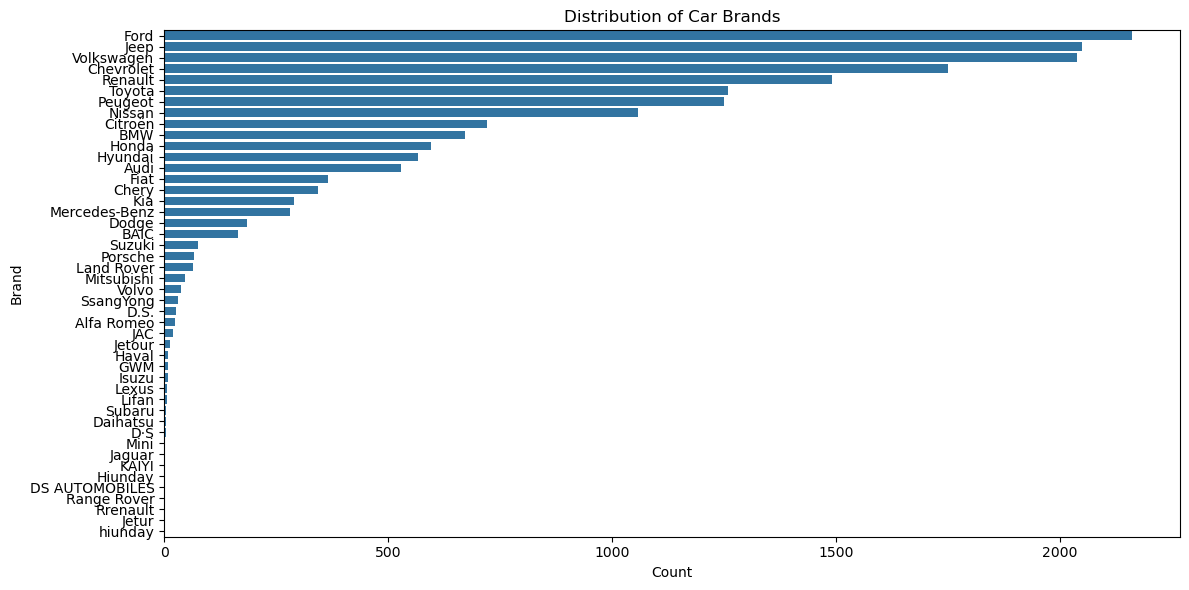

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=raw_dataset, y='Marca', order=raw_dataset['Marca'].value_counts().index)
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

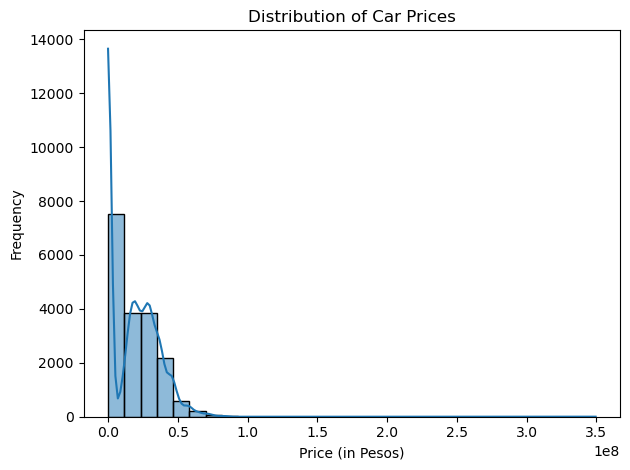

In [31]:
sns.histplot(raw_dataset['Precio'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in Pesos)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()